<a href="https://colab.research.google.com/github/priy474/House-Price-Prediction-ML/blob/main/House_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully!

Dataset:
    Area  Bedrooms  Bathrooms    Price
0   800         1          1  2000000
1  1000         2          1  3000000
2  1200         2          2  3600000
3  1500         3          2  4500000
4  1800         3          3  5500000

Linear Regression model created

Cross-validated R² scores: [0.76389299 0.76839288        nan]
Average R²: nan

Model trained on full dataset
Intercept: -100000.00000004796
Coefficients: [  1500. 550000. 400000.]

Predicted House Price: [4750000.00000001]

Model Evaluation Results
------------------------
MAE: 59999.99999999655
MSE: 4999999999.999953


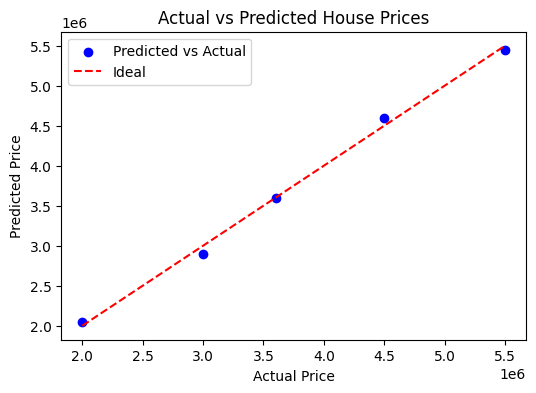

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Libraries imported successfully!")

# Step 2: Dataset
data = {
    'Area': [800, 1000, 1200, 1500, 1800],
    'Bedrooms': [1, 2, 2, 3, 3],
    'Bathrooms': [1, 1, 2, 2, 3],
    'Price': [2000000, 3000000, 3600000, 4500000, 5500000]
}

df = pd.DataFrame(data)
print("\nDataset:\n", df)

# Step 3: Features & Target
X = df[['Area', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Step 4: Model
model = LinearRegression()
print("\nLinear Regression model created")

# Step 5: Cross-validation R² (safe)
r2_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
print("\nCross-validated R² scores:", r2_scores)
print("Average R²:", r2_scores.mean())

# Step 6: Train on full dataset
model.fit(X, y)
print("\nModel trained on full dataset")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Step 7: Predict new house
new_house = pd.DataFrame([[1600, 3, 2]], columns=['Area', 'Bedrooms', 'Bathrooms'])
predicted_price = model.predict(new_house)
print("\nPredicted House Price:", predicted_price)

# Step 8: Model Evaluation
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("\nModel Evaluation Results")
print("------------------------")
print("MAE:", mae)
print("MSE:", mse)

# Step 9: Plot
plt.figure(figsize=(6,4))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()